In [1]:
###Required packages
import numpy as np
from hyperopt import hp, fmin, tpe
from scikits.odes.ode import ode
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import random
from geneticalgorithm import geneticalgorithm as ga


In [2]:
def toy_model(t, y, ydot, params):
    kc=12.; km=10.; lam=1.93E-4; Vin=1.; e0=0.0467
    T = 1; E = 2; X = 2
    A, W = params
    ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - y[2]*nonlinearity(y[0], kc, km)
    ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
    for e in range(E):
        ydot[e+X] = -lam*y[e+X] + np.sum(A[e]*np.array([activation(y[T], W[e][2], W[e][1], W[e][0]), repression(y[T], W[e][2], W[e][1], W[e][0]), W[e][2]]))
    ydot[E+X] = (Vin - y[X+1]*nonlinearity(y[X-1], kc, km))**2 #J1
    ydot[E+X+1] = np.sum([np.sum(A[e]*np.array([activation(y[T], W[e][2], W[e][1], W[e][0]), repression(y[T], W[e][2], W[e][1], W[e][0]), W[e][2]])) for e in range(E)]) #J2

def arch_converter(A):
    if A == 1: #dual control
        return ((0, 1, 0), (1, 0, 0))

    elif A == 2: #no control
        return ((0, 0, 1), (0, 0, 1))

    elif A == 3: #downstream activation
        return ((0, 0, 1), (1, 0, 0))

    elif A == 4: #upstream repression
        return ((0, 1, 0), (0, 0, 1))
    else: return 'Invalid Circuit'

def loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2):
        """Computes scalarized loss including genetic constraint and product production"""
        loss = alpha1*j1 + alpha2*j2
        return j1, j2, loss

def activation(x, k, theta, n):
    return (k*(x/theta)**n)/(1+(x/theta)**n)

def repression(x, k, theta, n):
    return k/(1+(x/theta)**n)
    
def nonlinearity(x, kc, km):
    return (kc*x)/(km+x)

492189.232832395 324153.32799999986 3246.4551723283225


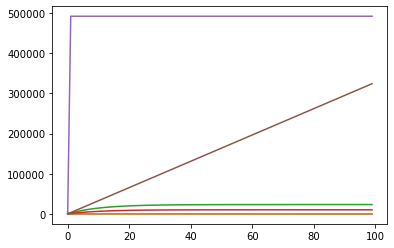

In [8]:
vars = [2.00000000e+00, 7.88726164e-04, 9.62460508e-04, 4.49906622e+00, 1.98400034e+00]
A, k1, k2, theta1, theta2 = vars

t = np.linspace(0, 5E4, 100) 
y0 = np.array([2290., 0., 0., 0., 0., 0.])

architecture = arch_converter(vars[0])
param_values = [[2., k1, theta1], [2., k2, theta2]]

extra_options = {'old_api': False, 'user_data': [architecture, param_values], 'rtol':1E-4}
ode_solver = ode('cvode', toy_model, **extra_options)
solution = ode_solver.solve(t, y0)
j1, j2 = solution.values.y[-1, -2:]
j1, j2, loss = loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2)
plt.plot(solution.values.y)
print(j1, j2, loss)

492189.232832395 324153.32799999986 3246.4551723283225


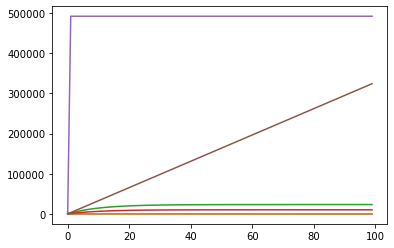

In [10]:
def f(X):
    A, k1, k2, theta1, theta2 = X
    t = np.linspace(0, 5E4, 100) 
    y0 = np.array([2290., 0., 0., 0., 0., 0.])
    architecture = arch_converter(A)
    param_values = [[2., k1, theta1], [2., k2, theta2]]
    extra_options = {'old_api': False, 'user_data': [architecture, param_values], 'rtol':1E-4}
    ode_solver = ode('cvode', toy_model, **extra_options)
    solution = ode_solver.solve(t, y0)
    j1, j2 = solution.values.y[-1, -2:]
    j1, j2, loss = loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2)
    if (str(solution.flag) == 'StatusEnum.SUCCESS'): return solution
    else: return 1.E7

solution = f(vars)
j1, j2 = solution.values.y[-1, -2:]
j1, j2, loss = loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2)
plt.plot(solution.values.y)
print(j1, j2, loss)

__________________________________________________ 0.5% GA is running...


[CVODE ERROR]  CVode
  At t = 265.869, mxstep steps taken before reaching tout.



__________________________________________________ 0.9% GA is running...


[CVODE ERROR]  CVode
  At t = 474.362 and h = 0.000598864, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 723.895 and h = 0.000337156, the error test failed repeatedly or with |h| = hmin.



|_________________________________________________ 1.2% GA is running...


[CVODE ERROR]  CVode
  At t = 421.974, mxstep steps taken before reaching tout.



|_________________________________________________ 1.4% GA is running...


[CVODE ERROR]  CVode
  At t = 347.941, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 1756.02 and h = 0.00113649, the error test failed repeatedly or with |h| = hmin.



|_________________________________________________ 1.7% GA is running...


[CVODE ERROR]  CVode
  At t = 259.662, mxstep steps taken before reaching tout.



|_________________________________________________ 1.8% GA is running...


[CVODE ERROR]  CVode
  At t = 363.823, mxstep steps taken before reaching tout.



|_________________________________________________ 2.4% GA is running...


[CVODE ERROR]  CVode
  At t = 229.943, mxstep steps taken before reaching tout.



|_________________________________________________ 2.5% GA is running...


[CVODE ERROR]  CVode
  At t = 459.229, mxstep steps taken before reaching tout.



|_________________________________________________ 2.8% GA is running...


[CVODE ERROR]  CVode
  At t = 143.796, mxstep steps taken before reaching tout.



|_________________________________________________ 2.9% GA is running...


[CVODE ERROR]  CVode
  At t = 668.473 and h = 0.000718607, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.0% GA is running...


[CVODE ERROR]  CVode
  At t = 252.887, mxstep steps taken before reaching tout.



||________________________________________________ 3.1% GA is running...


[CVODE ERROR]  CVode
  At t = 466.933 and h = 0.000644208, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.3% GA is running...


[CVODE ERROR]  CVode
  At t = 467.443, mxstep steps taken before reaching tout.



||________________________________________________ 3.7% GA is running...


[CVODE ERROR]  CVode
  At t = 477.108, mxstep steps taken before reaching tout.



||________________________________________________ 4.3% GA is running...


[CVODE ERROR]  CVode
  At t = 1935.6 and h = 0.000946471, the error test failed repeatedly or with |h| = hmin.



|||_______________________________________________ 5.2% GA is running...


[CVODE ERROR]  CVode
  At t = 383.394, mxstep steps taken before reaching tout.



|||_______________________________________________ 5.4% GA is running...


[CVODE ERROR]  CVode
  At t = 969.48 and h = 0.000252127, the error test failed repeatedly or with |h| = hmin.



|||_______________________________________________ 5.6% GA is running...


[CVODE ERROR]  CVode
  At t = 969.48 and h = 0.000252127, the error test failed repeatedly or with |h| = hmin.



|||_______________________________________________ 5.7% GA is running...


[CVODE ERROR]  CVode
  At t = 326.351, mxstep steps taken before reaching tout.



|||_______________________________________________ 5.9% GA is running...


[CVODE ERROR]  CVode
  At t = 386.299, mxstep steps taken before reaching tout.



|||_______________________________________________ 6.6% GA is running...


[CVODE ERROR]  CVode
  At t = 198.636, mxstep steps taken before reaching tout.



||||______________________________________________ 7.1% GA is running...


[CVODE ERROR]  CVode
  At t = 12444.3 and h = 0.000447078, the error test failed repeatedly or with |h| = hmin.



||||______________________________________________ 7.4% GA is running...


[CVODE ERROR]  CVode
  At t = 12444.3 and h = 0.000447078, the error test failed repeatedly or with |h| = hmin.



||||______________________________________________ 7.6% GA is running...


[CVODE ERROR]  CVode
  At t = 504.597 and h = 4.28231e-05, the error test failed repeatedly or with |h| = hmin.



||||______________________________________________ 8.1% GA is running...


[CVODE ERROR]  CVode
  At t = 374.07, mxstep steps taken before reaching tout.



||||______________________________________________ 8.4% GA is running...


[CVODE ERROR]  CVode
  At t = 423.912, mxstep steps taken before reaching tout.



||||______________________________________________ 8.7% GA is running...


[CVODE ERROR]  CVode
  At t = 404.03 and h = 0.000390694, the error test failed repeatedly or with |h| = hmin.



||||______________________________________________ 8.8% GA is running...


[CVODE ERROR]  CVode
  At t = 3055.11 and h = 0.00136252, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 9.4% GA is running...


[CVODE ERROR]  CVode
  At t = 990 and h = 0.000103522, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 9.5% GA is running...


[CVODE ERROR]  CVode
  At t = 4463.08 and h = 0.00168726, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 9.6% GA is running...


[CVODE ERROR]  CVode
  At t = 400.262, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 432.542, mxstep steps taken before reaching tout.



|||||_____________________________________________ 10.2% GA is running...


[CVODE ERROR]  CVode
  At t = 434.999, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.3% GA is running...


[CVODE ERROR]  CVode
  At t = 5628.88 and h = 0.000972514, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 12.4% GA is running...


[CVODE ERROR]  CVode
  At t = 339.491, mxstep steps taken before reaching tout.



||||||____________________________________________ 12.7% GA is running...


[CVODE ERROR]  CVode
  At t = 256.086, mxstep steps taken before reaching tout.



||||||____________________________________________ 12.9% GA is running...


[CVODE ERROR]  CVode
  At t = 490.184 and h = 9.45546e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 275.833, mxstep steps taken before reaching tout.



|||||||___________________________________________ 13.2% GA is running...


[CVODE ERROR]  CVode
  At t = 361.954, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 411.187, mxstep steps taken before reaching tout.



|||||||___________________________________________ 14.0% GA is running...


[CVODE ERROR]  CVode
  At t = 2522.23 and h = 0.0012185, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 17.2% GA is running...


[CVODE ERROR]  CVode
  At t = 883.569 and h = 0.000130892, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 17.4% GA is running...


[CVODE ERROR]  CVode
  At t = 22283.9 and h = 0.00521145, the error test failed repeatedly or with |h| = hmin.



||||||||||________________________________________ 19.0% GA is running...


[CVODE ERROR]  CVode
  At t = 103.811, mxstep steps taken before reaching tout.



||||||||||________________________________________ 19.3% GA is running...


[CVODE ERROR]  CVode
  At t = 315.849, mxstep steps taken before reaching tout.



||||||||||________________________________________ 19.5% GA is running...


[CVODE ERROR]  CVode
  At t = 838.288 and h = 0.000243637, the error test failed repeatedly or with |h| = hmin.



||||||||||________________________________________ 19.6% GA is running...


[CVODE ERROR]  CVode
  At t = 192.688, mxstep steps taken before reaching tout.



||||||||||________________________________________ 19.7% GA is running...


[CVODE ERROR]  CVode
  At t = 236.722, mxstep steps taken before reaching tout.



||||||||||________________________________________ 21.0% GA is running...


[CVODE ERROR]  CVode
  At t = 433.972, mxstep steps taken before reaching tout.



|||||||||||_______________________________________ 22.2% GA is running...


[CVODE ERROR]  CVode
  At t = 189.805, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.3% GA is running...


[CVODE ERROR]  CVode
  At t = 66.2687, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 66.2687, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 25.7% GA is running...


[CVODE ERROR]  CVode
  At t = 842.948 and h = 0.000397487, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 489.898, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 463.639 and h = 4.70496e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 25.8% GA is running...


[CVODE ERROR]  CVode
  At t = 516.953 and h = 0.000105737, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 471.405, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 25.9% GA is running...


[CVODE ERROR]  CVode
  At t = 5975.69 and h = 6.30635e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 26.0% GA is running...


[CVODE ERROR]  CVode
  At t = 301.007, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 26.1% GA is running...


[CVODE ERROR]  CVode
  At t = 5975.69 and h = 6.30635e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 26.6% GA is running...


[CVODE ERROR]  CVode
  At t = 464.785, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.1% GA is running...


[CVODE ERROR]  CVode
  At t = 945.374 and h = 0.000245532, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 27.5% GA is running...


[CVODE ERROR]  CVode
  At t = 1234.35 and h = 7.25376e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||__________________________________ 31.0% GA is running...


[CVODE ERROR]  CVode
  At t = 316.053, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 31.3% GA is running...


[CVODE ERROR]  CVode
  At t = 1043.35 and h = 0.000152431, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||__________________________________ 31.8% GA is running...


[CVODE ERROR]  CVode
  At t = 707.589 and h = 1.91466e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 392.586 and h = 0.000223995, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||__________________________________ 32.4% GA is running...


[CVODE ERROR]  CVode
  At t = 3107.1 and h = 0.000409805, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||_________________________________ 33.3% GA is running...


[CVODE ERROR]  CVode
  At t = 416.295, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 33.8% GA is running...


[CVODE ERROR]  CVode
  At t = 321.836 and h = 0.000267582, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||_________________________________ 34.6% GA is running...


[CVODE ERROR]  CVode
  At t = 7501.82 and h = 0.00185182, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||_________________________________ 34.8% GA is running...


[CVODE ERROR]  CVode
  At t = 324.818, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 35.3% GA is running...


[CVODE ERROR]  CVode
  At t = 365.927, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 35.4% GA is running...


[CVODE ERROR]  CVode
  At t = 426.27, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 35.6% GA is running...


[CVODE ERROR]  CVode
  At t = 1.8507 and h = 3.92985e-07, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 618.991 and h = 0.000185422, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 35.8% GA is running...


[CVODE ERROR]  CVode
  At t = 321.858, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.0% GA is running...


[CVODE ERROR]  CVode
  At t = 439.521 and h = 8.41922e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 298.519, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.3% GA is running...


[CVODE ERROR]  CVode
  At t = 360.275, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.4% GA is running...


[CVODE ERROR]  CVode
  At t = 763.203 and h = 5.73292e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 36.5% GA is running...


[CVODE ERROR]  CVode
  At t = 267.086, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.6% GA is running...


[CVODE ERROR]  CVode
  At t = 253.627, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.9% GA is running...


[CVODE ERROR]  CVode
  At t = 327.926, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 37.0% GA is running...


[CVODE ERROR]  CVode
  At t = 444.622, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.3% GA is running...


[CVODE ERROR]  CVode
  At t = 311.421 and h = 6.22889e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 37.4% GA is running...


[CVODE ERROR]  CVode
  At t = 311.421 and h = 6.22889e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 37.6% GA is running...


[CVODE ERROR]  CVode
  At t = 311.421 and h = 6.22889e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 39.5% GA is running...


[CVODE ERROR]  CVode
  At t = 437.651, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 39.8% GA is running...


[CVODE ERROR]  CVode
  At t = 316.093, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 40.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1140.67 and h = 8.69965e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 40.1% GA is running...


[CVODE ERROR]  CVode
  At t = 1140.67 and h = 8.69965e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 40.2% GA is running...


[CVODE ERROR]  CVode
  At t = 1140.67 and h = 8.69965e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 40.8% GA is running...


[CVODE ERROR]  CVode
  At t = 1554.19 and h = 8.06298e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 420.015, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.9% GA is running...


[CVODE ERROR]  CVode
  At t = 856.117 and h = 0.000949686, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 42.4% GA is running...


[CVODE ERROR]  CVode
  At t = 407.679 and h = 3.12227e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 42.6% GA is running...


[CVODE ERROR]  CVode
  At t = 3254.05 and h = 0.000535797, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||__________________________ 47.3% GA is running...


[CVODE ERROR]  CVode
  At t = 606.434 and h = 0.000102486, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||__________________________ 47.6% GA is running...


[CVODE ERROR]  CVode
  At t = 776.893 and h = 7.42499e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.3% GA is running...


[CVODE ERROR]  CVode
  At t = 308.581 and h = 7.7639e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.5% GA is running...


[CVODE ERROR]  CVode
  At t = 2944.12 and h = 0.00107295, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.6% GA is running...


[CVODE ERROR]  CVode
  At t = 2944.12 and h = 0.00107295, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 50.1% GA is running...


[CVODE ERROR]  CVode
  At t = 325.233, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 50.5% GA is running...


[CVODE ERROR]  CVode
  At t = 5559.6 and h = 0.00164241, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 50.6% GA is running...


[CVODE ERROR]  CVode
  At t = 422.211, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 51.2% GA is running...


[CVODE ERROR]  CVode
  At t = 433.565, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 52.4% GA is running...


[CVODE ERROR]  CVode
  At t = 384.748, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 52.6% GA is running...


[CVODE ERROR]  CVode
  At t = 8160.23 and h = 0.0010273, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||_______________________ 53.3% GA is running...


[CVODE ERROR]  CVode
  At t = 347.449, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 53.5% GA is running...


[CVODE ERROR]  CVode
  At t = 440.796, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 54.7% GA is running...


[CVODE ERROR]  CVode
  At t = 8891.29 and h = 0.000264418, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||_______________________ 54.9% GA is running...


[CVODE ERROR]  CVode
  At t = 8891.29 and h = 0.000264418, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||______________________ 55.6% GA is running...


[CVODE ERROR]  CVode
  At t = 1321.77 and h = 0.000116953, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 316.593, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 55.9% GA is running...


[CVODE ERROR]  CVode
  At t = 451.906, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 56.0% GA is running...


[CVODE ERROR]  CVode
  At t = 3238.09 and h = 0.000436283, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||______________________ 56.7% GA is running...


[CVODE ERROR]  CVode
  At t = 356.783, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 57.5% GA is running...


[CVODE ERROR]  CVode
  At t = 1586.52 and h = 0.000206349, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||_____________________ 58.3% GA is running...


[CVODE ERROR]  CVode
  At t = 363.484, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 58.8% GA is running...


[CVODE ERROR]  CVode
  At t = 670.116 and h = 0.000204059, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 396.189, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 58.9% GA is running...


[CVODE ERROR]  CVode
  At t = 271.913, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 569.709 and h = 4.83506e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 59.3% GA is running...


[CVODE ERROR]  CVode
  At t = 778.318 and h = 0.000726227, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 59.4% GA is running...


[CVODE ERROR]  CVode
  At t = 1169.36 and h = 0.000200432, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 59.5% GA is running...


[CVODE ERROR]  CVode
  At t = 224.576, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 59.6% GA is running...


[CVODE ERROR]  CVode
  At t = 501.342, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 318.889, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 59.7% GA is running...


[CVODE ERROR]  CVode
  At t = 402.993, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 1327.43 and h = 0.000195842, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 402.993, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 60.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1327.43 and h = 0.000195842, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 60.1% GA is running...


[CVODE ERROR]  CVode
  At t = 229.964, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 60.5% GA is running...


[CVODE ERROR]  CVode
  At t = 1327.43 and h = 0.000195842, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 60.6% GA is running...


[CVODE ERROR]  CVode
  At t = 302.396, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 60.8% GA is running...


[CVODE ERROR]  CVode
  At t = 479.64, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 63.1% GA is running...


[CVODE ERROR]  CVode
  At t = 1026.01 and h = 0.000214744, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||__________________ 63.6% GA is running...


[CVODE ERROR]  CVode
  At t = 314.139, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 64.1% GA is running...


[CVODE ERROR]  CVode
  At t = 10526.7 and h = 0.000514746, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||__________________ 64.3% GA is running...


[CVODE ERROR]  CVode
  At t = 460.849, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 64.4% GA is running...


[CVODE ERROR]  CVode
  At t = 439.274, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 64.5% GA is running...


[CVODE ERROR]  CVode
  At t = 175.407, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||_________________ 66.6% GA is running...


[CVODE ERROR]  CVode
  At t = 304.184, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||_________________ 66.9% GA is running...


[CVODE ERROR]  CVode
  At t = 1132.67 and h = 0.000181032, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||________________ 67.9% GA is running...


[CVODE ERROR]  CVode
  At t = 9682.45 and h = 0.00101121, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||_______________ 70.2% GA is running...


[CVODE ERROR]  CVode
  At t = 239.165, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||_______________ 70.4% GA is running...


[CVODE ERROR]  CVode
  At t = 376.069 and h = 0.000508096, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||______________ 72.0% GA is running...


[CVODE ERROR]  CVode
  At t = 45731 and h = 0.0296047, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||______________ 72.3% GA is running...


[CVODE ERROR]  CVode
  At t = 3656.48 and h = 0.00281567, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||______________ 72.5% GA is running...


[CVODE ERROR]  CVode
  At t = 3656.48 and h = 0.00281567, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 3656.48 and h = 0.00281567, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||______________ 72.8% GA is running...


[CVODE ERROR]  CVode
  At t = 3656.48 and h = 0.00281567, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||_____________ 74.3% GA is running...


[CVODE ERROR]  CVode
  At t = 217.2, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||_____________ 74.9% GA is running...


[CVODE ERROR]  CVode
  At t = 4363.73 and h = 0.000985373, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||____________ 76.0% GA is running...


[CVODE ERROR]  CVode
  At t = 5858.92 and h = 0.00422845, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||___________ 78.3% GA is running...


[CVODE ERROR]  CVode
  At t = 235.177, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 78.8% GA is running...


[CVODE ERROR]  CVode
  At t = 770.632 and h = 0.000744678, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||_________ 81.3% GA is running...


[CVODE ERROR]  CVode
  At t = 486.399 and h = 0.000446937, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||_________ 82.6% GA is running...


[CVODE ERROR]  CVode
  At t = 2018.93 and h = 0.000355912, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||________ 83.2% GA is running...


[CVODE ERROR]  CVode
  At t = 342.651, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||________ 83.3% GA is running...


[CVODE ERROR]  CVode
  At t = 367.627, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||________ 84.2% GA is running...


[CVODE ERROR]  CVode
  At t = 1439.57 and h = 0.00104237, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||________ 84.7% GA is running...


[CVODE ERROR]  CVode
  At t = 311.143, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||________ 84.9% GA is running...


[CVODE ERROR]  CVode
  At t = 9318.35 and h = 0.000205055, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.4% GA is running...


[CVODE ERROR]  CVode
  At t = 479.189 and h = 7.31239e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 87.7% GA is running...


[CVODE ERROR]  CVode
  At t = 1178.39 and h = 0.000286762, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 88.7% GA is running...


[CVODE ERROR]  CVode
  At t = 356.358, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 89.3% GA is running...


[CVODE ERROR]  CVode
  At t = 187.122, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||____ 91.4% GA is running...


[CVODE ERROR]  CVode
  At t = 142.846 and h = 0.000210632, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||||____ 91.6% GA is running...


[CVODE ERROR]  CVode
  At t = 1515.3 and h = 0.000128764, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||||||__ 95.9% GA is running...


[CVODE ERROR]  CVode
  At t = 352.956, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.5% GA is running...


[CVODE ERROR]  CVode
  At t = 425.894, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 239.785, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 313.844, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.2% GA is running...


[CVODE ERROR]  CVode
  At t = 771.068 and h = 0.000569571, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||||| 99.9% GA is running...


[CVODE ERROR]  CVode
  At t = 2980.13 and h = 0.0012453, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...


[CVODE ERROR]  CVode
  At t = 2958.19 and h = 0.000451265, the error test failed repeatedly or with |h| = hmin.



 The best solution found:                                                                           
 [1.00000000e+00 5.63506632e-07 9.97342989e-04 3.36373764e-02
 3.53349044e-03]

 Objective function:
 0.8835930752110202


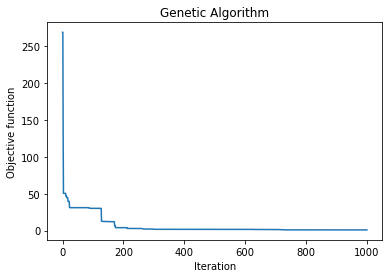

In [13]:
def f(X):
    A, k1, k2, theta1, theta2 = X
    t = np.linspace(0, 5E4, 100) 
    y0 = np.array([2290., 0., 0., 0., 0., 0.])
    architecture = arch_converter(A)
    param_values = [[2., k1, theta1], [2., k2, theta2]]
    extra_options = {'old_api': False, 'user_data': [architecture, param_values], 'rtol':1E-3}
    ode_solver = ode('cvode', toy_model, **extra_options)
    solution = ode_solver.solve(t, y0)
    j1, j2 = solution.values.y[-1, -2:]
    j1, j2, loss = loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2)
    if (str(solution.flag) == 'StatusEnum.SUCCESS') and loss > 0.0: return loss
    else: return 1.E7
    
varbound=np.array([[1,4],[1E-7,1E-3],[1E-7,1E-3], [1E-3, 10], [1E-3, 10]])
vartype=np.array([['int'], ['real'],['real'],['real'],['real']])


algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=5,variable_type_mixed=vartype,variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

results = model.output_dict

In [22]:
print(results)
model.report

{'variable': array([1.00000000e+00, 5.63506632e-07, 9.97342989e-04, 3.36373764e-02,
       3.53349044e-03]), 'function': 0.8835930752110202}


[269.15369646359665,
 269.15369646359665,
 129.9722209462603,
 50.49059957968443,
 50.49059957968443,
 50.49059957968443,
 50.49059957968443,
 50.49059957968443,
 50.49059957968443,
 50.49059957968443,
 50.49059957968443,
 46.63188121377586,
 46.63188121377586,
 46.63188121377586,
 44.58446259098893,
 44.58446259098893,
 44.58446259098893,
 44.42262066573003,
 39.52907374071844,
 39.52907374071844,
 39.52907374071844,
 39.52907374071844,
 39.52907374071844,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592791017,
 31.085392592


[CVODE ERROR]  CVode
  At t = 191.211, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 495.9, mxstep steps taken before reaching tout.



__________________________________________________ 0.1% GA is running...


[CVODE ERROR]  CVode
  At t = 328.929, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 198.62, mxstep steps taken before reaching tout.



__________________________________________________ 0.2% GA is running...


[CVODE ERROR]  CVode
  At t = 458.504, mxstep steps taken before reaching tout.



__________________________________________________ 0.3% GA is running...


[CVODE ERROR]  CVode
  At t = 280.887, mxstep steps taken before reaching tout.



__________________________________________________ 0.4% GA is running...


[CVODE ERROR]  CVode
  At t = 328.365 and h = 0.000412451, the error test failed repeatedly or with |h| = hmin.



__________________________________________________ 1.0% GA is running...


[CVODE ERROR]  CVode
  At t = 839.597 and h = 0.000212111, the error test failed repeatedly or with |h| = hmin.



|_________________________________________________ 1.6% GA is running...


[CVODE ERROR]  CVode
  At t = 1128.13 and h = 0.000583957, the error test failed repeatedly or with |h| = hmin.



|_________________________________________________ 2.2% GA is running...


[CVODE ERROR]  CVode
  At t = 283.712 and h = 0.000183441, the error test failed repeatedly or with |h| = hmin.



|_________________________________________________ 2.3% GA is running...


[CVODE ERROR]  CVode
  At t = 678.174 and h = 0.000220721, the error test failed repeatedly or with |h| = hmin.



|_________________________________________________ 2.4% GA is running...


[CVODE ERROR]  CVode
  At t = 465.405, mxstep steps taken before reaching tout.



||________________________________________________ 3.4% GA is running...


[CVODE ERROR]  CVode
  At t = 299.212 and h = 0.00031879, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.5% GA is running...


[CVODE ERROR]  CVode
  At t = 299.212 and h = 0.00031879, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.8% GA is running...


[CVODE ERROR]  CVode
  At t = 409.199, mxstep steps taken before reaching tout.



||________________________________________________ 4.2% GA is running...


[CVODE ERROR]  CVode
  At t = 243.041, mxstep steps taken before reaching tout.



||________________________________________________ 4.3% GA is running...


[CVODE ERROR]  CVode
  At t = 46.2101, mxstep steps taken before reaching tout.



|||_______________________________________________ 5.2% GA is running...


[CVODE ERROR]  CVode
  At t = 247.149, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 248.874, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 346.021, mxstep steps taken before reaching tout.



|||_______________________________________________ 5.3% GA is running...


[CVODE ERROR]  CVode
  At t = 3003.28 and h = 0.000885816, the error test failed repeatedly or with |h| = hmin.



|||_______________________________________________ 6.0% GA is running...


[CVODE ERROR]  CVode
  At t = 354.597, mxstep steps taken before reaching tout.



|||_______________________________________________ 6.6% GA is running...


[CVODE ERROR]  CVode
  At t = 434.648, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 363.406, mxstep steps taken before reaching tout.



|||_______________________________________________ 6.7% GA is running...


[CVODE ERROR]  CVode
  At t = 660.022 and h = 0.000194572, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 281.81, mxstep steps taken before reaching tout.



|||_______________________________________________ 6.8% GA is running...


[CVODE ERROR]  CVode
  At t = 322.89, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 397.556, mxstep steps taken before reaching tout.



||||______________________________________________ 7.5% GA is running...


[CVODE ERROR]  CVode
  At t = 315.307, mxstep steps taken before reaching tout.



||||______________________________________________ 7.7% GA is running...


[CVODE ERROR]  CVode
  At t = 458.598, mxstep steps taken before reaching tout.



||||______________________________________________ 7.8% GA is running...


[CVODE ERROR]  CVode
  At t = 351.613, mxstep steps taken before reaching tout.



||||______________________________________________ 7.9% GA is running...


[CVODE ERROR]  CVode
  At t = 314.951, mxstep steps taken before reaching tout.



||||______________________________________________ 8.2% GA is running...


[CVODE ERROR]  CVode
  At t = 384.177, mxstep steps taken before reaching tout.



||||______________________________________________ 8.7% GA is running...


[CVODE ERROR]  CVode
  At t = 526.811 and h = 0.000243536, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 10.2% GA is running...


[CVODE ERROR]  CVode
  At t = 11516.6 and h = 0.00193654, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 10.6% GA is running...


[CVODE ERROR]  CVode
  At t = 312.611, mxstep steps taken before reaching tout.



|||||_____________________________________________ 10.8% GA is running...


[CVODE ERROR]  CVode
  At t = 479.727, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.0% GA is running...


[CVODE ERROR]  CVode
  At t = 230.727, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.2% GA is running...


[CVODE ERROR]  CVode
  At t = 343.989, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.3% GA is running...


[CVODE ERROR]  CVode
  At t = 19.5156 and h = 8.48185e-06, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 11.4% GA is running...


[CVODE ERROR]  CVode
  At t = 343.989, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.5% GA is running...


[CVODE ERROR]  CVode
  At t = 256.75, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.7% GA is running...


[CVODE ERROR]  CVode
  At t = 319.29, mxstep steps taken before reaching tout.



||||||____________________________________________ 12.3% GA is running...


[CVODE ERROR]  CVode
  At t = 230.9, mxstep steps taken before reaching tout.



||||||____________________________________________ 12.5% GA is running...


[CVODE ERROR]  CVode
  At t = 669.192 and h = 0.00016676, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 12.6% GA is running...


[CVODE ERROR]  CVode
  At t = 388.592, mxstep steps taken before reaching tout.



||||||____________________________________________ 13.0% GA is running...


[CVODE ERROR]  CVode
  At t = 455.9, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 439.394, mxstep steps taken before reaching tout.



|||||||___________________________________________ 13.3% GA is running...


[CVODE ERROR]  CVode
  At t = 539.778 and h = 0.000404883, the error test failed repeatedly or with |h| = hmin.



|||||||___________________________________________ 13.6% GA is running...


[CVODE ERROR]  CVode
  At t = 541.481 and h = 0.000144765, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 460.532, mxstep steps taken before reaching tout.



|||||||___________________________________________ 13.9% GA is running...


[CVODE ERROR]  CVode
  At t = 286.023, mxstep steps taken before reaching tout.



|||||||___________________________________________ 14.1% GA is running...


[CVODE ERROR]  CVode
  At t = 354.229, mxstep steps taken before reaching tout.



|||||||___________________________________________ 14.4% GA is running...


[CVODE ERROR]  CVode
  At t = 960.699 and h = 0.000239924, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 288.121, mxstep steps taken before reaching tout.



|||||||___________________________________________ 14.6% GA is running...


[CVODE ERROR]  CVode
  At t = 382.272, mxstep steps taken before reaching tout.



||||||||__________________________________________ 16.8% GA is running...


[CVODE ERROR]  CVode
  At t = 291.616, mxstep steps taken before reaching tout.



|||||||||_________________________________________ 18.2% GA is running...


[CVODE ERROR]  CVode
  At t = 452.648, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 452.648, mxstep steps taken before reaching tout.



|||||||||_________________________________________ 18.3% GA is running...


[CVODE ERROR]  CVode
  At t = 335.059, mxstep steps taken before reaching tout.



|||||||||_________________________________________ 18.4% GA is running...


[CVODE ERROR]  CVode
  At t = 435.54, mxstep steps taken before reaching tout.



||||||||||________________________________________ 19.8% GA is running...


[CVODE ERROR]  CVode
  At t = 423.485, mxstep steps taken before reaching tout.



||||||||||________________________________________ 20.5% GA is running...


[CVODE ERROR]  CVode
  At t = 493.647, mxstep steps taken before reaching tout.



||||||||||________________________________________ 21.0% GA is running...


[CVODE ERROR]  CVode
  At t = 396.6 and h = 0.000300839, the error test failed repeatedly or with |h| = hmin.



|||||||||||_______________________________________ 21.4% GA is running...


[CVODE ERROR]  CVode
  At t = 405.053, mxstep steps taken before reaching tout.



|||||||||||_______________________________________ 22.1% GA is running...


[CVODE ERROR]  CVode
  At t = 610.117 and h = 5.21967e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||_______________________________________ 22.2% GA is running...


[CVODE ERROR]  CVode
  At t = 281.323 and h = 4.77909e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||_______________________________________ 22.3% GA is running...


[CVODE ERROR]  CVode
  At t = 327.124, mxstep steps taken before reaching tout.



|||||||||||_______________________________________ 22.6% GA is running...


[CVODE ERROR]  CVode
  At t = 469.505, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 291.611 and h = 0.000544259, the error test failed repeatedly or with |h| = hmin.



|||||||||||_______________________________________ 22.7% GA is running...


[CVODE ERROR]  CVode
  At t = 327.124, mxstep steps taken before reaching tout.



|||||||||||_______________________________________ 22.9% GA is running...


[CVODE ERROR]  CVode
  At t = 291.611 and h = 0.000544259, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 291.611 and h = 0.000544259, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 411.478, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.0% GA is running...


[CVODE ERROR]  CVode
  At t = 307.952, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 373.377, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 307.952, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.1% GA is running...


[CVODE ERROR]  CVode
  At t = 336.914, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.4% GA is running...


[CVODE ERROR]  CVode
  At t = 332.972, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.6% GA is running...


[CVODE ERROR]  CVode
  At t = 179.049, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 346.409 and h = 0.00032268, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 309.923, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.7% GA is running...


[CVODE ERROR]  CVode
  At t = 397.714, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 24.2% GA is running...


[CVODE ERROR]  CVode
  At t = 264.76 and h = 2.14024e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||______________________________________ 24.3% GA is running...


[CVODE ERROR]  CVode
  At t = 503.666, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 381.469 and h = 0.000396924, the error test failed repeatedly or with |h| = hmin.



||||||||||||______________________________________ 24.4% GA is running...


[CVODE ERROR]  CVode
  At t = 14660.9 and h = 0.00420656, the error test failed repeatedly or with |h| = hmin.



||||||||||||______________________________________ 24.7% GA is running...


[CVODE ERROR]  CVode
  At t = 354.318, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 25.0% GA is running...


[CVODE ERROR]  CVode
  At t = 420.609 and h = 5.71694e-06, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 25.1% GA is running...


[CVODE ERROR]  CVode
  At t = 499.198, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 25.2% GA is running...


[CVODE ERROR]  CVode
  At t = 499.198, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 499.198, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 25.7% GA is running...


[CVODE ERROR]  CVode
  At t = 315.686, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 25.8% GA is running...


[CVODE ERROR]  CVode
  At t = 315.686, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 315.686, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 315.686, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 26.2% GA is running...


[CVODE ERROR]  CVode
  At t = 316.417, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 26.6% GA is running...


[CVODE ERROR]  CVode
  At t = 429.54, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 26.8% GA is running...


[CVODE ERROR]  CVode
  At t = 322.785, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.0% GA is running...


[CVODE ERROR]  CVode
  At t = 326.367, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 347.699, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.2% GA is running...


[CVODE ERROR]  CVode
  At t = 426.047 and h = 0.000262914, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 27.4% GA is running...


[CVODE ERROR]  CVode
  At t = 295.413, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.6% GA is running...


[CVODE ERROR]  CVode
  At t = 260.121, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.8% GA is running...


[CVODE ERROR]  CVode
  At t = 260.121, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 340.106 and h = 0.000450161, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 27.9% GA is running...


[CVODE ERROR]  CVode
  At t = 271.835, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.0% GA is running...


[CVODE ERROR]  CVode
  At t = 425.48, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 425.48, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.1% GA is running...


[CVODE ERROR]  CVode
  At t = 425.48, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 221.287, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 269.12, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.2% GA is running...


[CVODE ERROR]  CVode
  At t = 269.12, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 300.789, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 334.809 and h = 0.000202983, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 217.246, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.3% GA is running...


[CVODE ERROR]  CVode
  At t = 244.839 and h = 3.66952e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 300.789, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 425.48, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.5% GA is running...


[CVODE ERROR]  CVode
  At t = 398.492, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.6% GA is running...


[CVODE ERROR]  CVode
  At t = 331.762, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.7% GA is running...


[CVODE ERROR]  CVode
  At t = 352.307 and h = 0.000341698, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 267.421, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 391.378, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.8% GA is running...


[CVODE ERROR]  CVode
  At t = 406.735, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.1% GA is running...


[CVODE ERROR]  CVode
  At t = 464, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 491.821, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.2% GA is running...


[CVODE ERROR]  CVode
  At t = 330.689 and h = 8.17122e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 398.674, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 369.109, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.4% GA is running...


[CVODE ERROR]  CVode
  At t = 306.135, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 485.492, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.5% GA is running...


[CVODE ERROR]  CVode
  At t = 250.615, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.6% GA is running...


[CVODE ERROR]  CVode
  At t = 464, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 464, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.7% GA is running...


[CVODE ERROR]  CVode
  At t = 359.605 and h = 8.39029e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||___________________________________ 29.8% GA is running...


[CVODE ERROR]  CVode
  At t = 325.415, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 30.0% GA is running...


[CVODE ERROR]  CVode
  At t = 474.796 and h = 0.000517683, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||___________________________________ 30.3% GA is running...


[CVODE ERROR]  CVode
  At t = 408.757, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 30.6% GA is running...


[CVODE ERROR]  CVode
  At t = 452.539, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 30.8% GA is running...


[CVODE ERROR]  CVode
  At t = 318.887, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 335.292, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 31.1% GA is running...


[CVODE ERROR]  CVode
  At t = 335.292, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 31.3% GA is running...


[CVODE ERROR]  CVode
  At t = 368.594 and h = 0.00037116, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 427.764, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 32.4% GA is running...


[CVODE ERROR]  CVode
  At t = 308.479 and h = 2.11928e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||__________________________________ 32.5% GA is running...


[CVODE ERROR]  CVode
  At t = 383.95, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 33.0% GA is running...


[CVODE ERROR]  CVode
  At t = 414.941, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 33.5% GA is running...


[CVODE ERROR]  CVode
  At t = 449.734 and h = 0.00080102, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 401.928, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 33.6% GA is running...


[CVODE ERROR]  CVode
  At t = 401.928, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 34.0% GA is running...


[CVODE ERROR]  CVode
  At t = 353.116, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 34.1% GA is running...


[CVODE ERROR]  CVode
  At t = 508.651 and h = 0.000107022, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 35.2% GA is running...


[CVODE ERROR]  CVode
  At t = 377.996, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 35.5% GA is running...


[CVODE ERROR]  CVode
  At t = 258.472, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 35.6% GA is running...


[CVODE ERROR]  CVode
  At t = 291.133, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.5% GA is running...


[CVODE ERROR]  CVode
  At t = 173.894 and h = 0.00024302, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 37.1% GA is running...


[CVODE ERROR]  CVode
  At t = 440.948, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.2% GA is running...


[CVODE ERROR]  CVode
  At t = 343.053, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.3% GA is running...


[CVODE ERROR]  CVode
  At t = 324.464, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.5% GA is running...


[CVODE ERROR]  CVode
  At t = 454.176, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.8% GA is running...


[CVODE ERROR]  CVode
  At t = 422.149 and h = 8.49152e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 339.254, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 38.3% GA is running...


[CVODE ERROR]  CVode
  At t = 5301.49 and h = 0.00118227, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 38.7% GA is running...


[CVODE ERROR]  CVode
  At t = 3752.1 and h = 0.000785945, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 38.8% GA is running...


[CVODE ERROR]  CVode
  At t = 3752.1 and h = 0.000785945, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 39.2% GA is running...


[CVODE ERROR]  CVode
  At t = 266.195, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 39.3% GA is running...


[CVODE ERROR]  CVode
  At t = 1478.2 and h = 0.000235624, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 40.8% GA is running...


[CVODE ERROR]  CVode
  At t = 288.929, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 549.9 and h = 6.12827e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 40.9% GA is running...


[CVODE ERROR]  CVode
  At t = 355.364, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.1% GA is running...


[CVODE ERROR]  CVode
  At t = 549.9 and h = 6.12827e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 278.455, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.3% GA is running...


[CVODE ERROR]  CVode
  At t = 403.464 and h = 0.00029292, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 41.4% GA is running...


[CVODE ERROR]  CVode
  At t = 370.384, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.5% GA is running...


[CVODE ERROR]  CVode
  At t = 499.689, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.7% GA is running...


[CVODE ERROR]  CVode
  At t = 494.499, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.8% GA is running...


[CVODE ERROR]  CVode
  At t = 417.704 and h = 0.000119512, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 42.1% GA is running...


[CVODE ERROR]  CVode
  At t = 334.011, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 42.4% GA is running...


[CVODE ERROR]  CVode
  At t = 305.906 and h = 0.000201381, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 42.7% GA is running...


[CVODE ERROR]  CVode
  At t = 482.775, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 42.9% GA is running...


[CVODE ERROR]  CVode
  At t = 493.56, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 493.56, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.0% GA is running...


[CVODE ERROR]  CVode
  At t = 218.708, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.1% GA is running...


[CVODE ERROR]  CVode
  At t = 437.426, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.2% GA is running...


[CVODE ERROR]  CVode
  At t = 203.675, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.3% GA is running...


[CVODE ERROR]  CVode
  At t = 405.17, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.4% GA is running...


[CVODE ERROR]  CVode
  At t = 446.097, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.6% GA is running...


[CVODE ERROR]  CVode
  At t = 242.349, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 44.1% GA is running...


[CVODE ERROR]  CVode
  At t = 708.917 and h = 0.000250753, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||____________________________ 44.6% GA is running...


[CVODE ERROR]  CVode
  At t = 324.572, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 339.254, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 44.8% GA is running...


[CVODE ERROR]  CVode
  At t = 436.877, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 44.9% GA is running...


[CVODE ERROR]  CVode
  At t = 501.747, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.2% GA is running...


[CVODE ERROR]  CVode
  At t = 365.852, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 405.563, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.3% GA is running...


[CVODE ERROR]  CVode
  At t = 431.702, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.4% GA is running...


[CVODE ERROR]  CVode
  At t = 1522.25 and h = 0.000430647, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 781.82 and h = 3.92321e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||___________________________ 45.9% GA is running...


[CVODE ERROR]  CVode
  At t = 227.053, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.1% GA is running...


[CVODE ERROR]  CVode
  At t = 270.574, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.3% GA is running...


[CVODE ERROR]  CVode
  At t = 270.574, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 270.574, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 270.574, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 270.574, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.4% GA is running...


[CVODE ERROR]  CVode
  At t = 270.574, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 363.514 and h = 0.000164032, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||___________________________ 46.5% GA is running...


[CVODE ERROR]  CVode
  At t = 339.267, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.7% GA is running...


[CVODE ERROR]  CVode
  At t = 244.896, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 264.099, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 47.0% GA is running...


[CVODE ERROR]  CVode
  At t = 395.955, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 47.2% GA is running...


[CVODE ERROR]  CVode
  At t = 397.925 and h = 4.09228e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 349.273, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 47.4% GA is running...


[CVODE ERROR]  CVode
  At t = 242.441, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.0% GA is running...


[CVODE ERROR]  CVode
  At t = 0.723745 and h = 3.04048e-07, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||__________________________ 48.5% GA is running...


[CVODE ERROR]  CVode
  At t = 480.337, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 463.529, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.6% GA is running...


[CVODE ERROR]  CVode
  At t = 341.618, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 463.529, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.7% GA is running...


[CVODE ERROR]  CVode
  At t = 446.535, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.9% GA is running...


[CVODE ERROR]  CVode
  At t = 462.252, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 49.2% GA is running...


[CVODE ERROR]  CVode
  At t = 409.378, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 409.326, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 2.19499 and h = 8.70844e-07, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.3% GA is running...


[CVODE ERROR]  CVode
  At t = 180.597, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 325.521, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 49.7% GA is running...


[CVODE ERROR]  CVode
  At t = 347.338 and h = 9.92754e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||________________________ 52.3% GA is running...


[CVODE ERROR]  CVode
  At t = 234.885, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 52.4% GA is running...


[CVODE ERROR]  CVode
  At t = 395.238, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 53.9% GA is running...


[CVODE ERROR]  CVode
  At t = 24364.9 and h = 0.0126314, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 341.265, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 54.3% GA is running...


[CVODE ERROR]  CVode
  At t = 339.828 and h = 5.27435e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 482.712, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 54.4% GA is running...


[CVODE ERROR]  CVode
  At t = 346.503, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 55.0% GA is running...


[CVODE ERROR]  CVode
  At t = 15832.9 and h = 0.00673891, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||______________________ 55.3% GA is running...


[CVODE ERROR]  CVode
  At t = 12759.3 and h = 0.00195331, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 12759.3 and h = 0.00195331, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||______________________ 55.4% GA is running...


[CVODE ERROR]  CVode
  At t = 456.024, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 55.8% GA is running...


[CVODE ERROR]  CVode
  At t = 6245.3 and h = 0.00257075, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 386.715 and h = 0.000343279, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||______________________ 56.6% GA is running...


[CVODE ERROR]  CVode
  At t = 5.23023 and h = 3.00295e-06, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||______________________ 56.9% GA is running...


[CVODE ERROR]  CVode
  At t = 478.057 and h = 0.000784916, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||_____________________ 57.3% GA is running...


[CVODE ERROR]  CVode
  At t = 489.386, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 57.4% GA is running...


[CVODE ERROR]  CVode
  At t = 289.3, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 58.2% GA is running...


[CVODE ERROR]  CVode
  At t = 504.931, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 58.8% GA is running...


[CVODE ERROR]  CVode
  At t = 380.743 and h = 1.63413e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 60.4% GA is running...


[CVODE ERROR]  CVode
  At t = 335.345, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 60.8% GA is running...


[CVODE ERROR]  CVode
  At t = 489.117, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 61.3% GA is running...


[CVODE ERROR]  CVode
  At t = 273.498, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 61.4% GA is running...


[CVODE ERROR]  CVode
  At t = 480.367, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 61.5% GA is running...


[CVODE ERROR]  CVode
  At t = 341.384, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 61.7% GA is running...


[CVODE ERROR]  CVode
  At t = 367.286, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 61.8% GA is running...


[CVODE ERROR]  CVode
  At t = 309.296 and h = 0.000113059, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||___________________ 61.9% GA is running...


[CVODE ERROR]  CVode
  At t = 373.936, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 213.247, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 240.394, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 62.0% GA is running...


[CVODE ERROR]  CVode
  At t = 373.936, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 240.394, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 62.3% GA is running...


[CVODE ERROR]  CVode
  At t = 373.936, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 373.936, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 373.936, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 62.4% GA is running...


[CVODE ERROR]  CVode
  At t = 490.259, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 62.6% GA is running...


[CVODE ERROR]  CVode
  At t = 373.936, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 64.1% GA is running...


[CVODE ERROR]  CVode
  At t = 849.686 and h = 0.000299094, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||__________________ 64.4% GA is running...


[CVODE ERROR]  CVode
  At t = 223.8, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 64.5% GA is running...


[CVODE ERROR]  CVode
  At t = 315.186, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||_________________ 65.8% GA is running...


[CVODE ERROR]  CVode
  At t = 455.784, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||________________ 68.6% GA is running...


[CVODE ERROR]  CVode
  At t = 399.736, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||________________ 68.9% GA is running...


[CVODE ERROR]  CVode
  At t = 351.343 and h = 0.00013198, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 351.343 and h = 0.00013198, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 385.898 and h = 0.000467684, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||________________ 69.0% GA is running...


[CVODE ERROR]  CVode
  At t = 560.663 and h = 2.30938e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||_______________ 69.3% GA is running...


[CVODE ERROR]  CVode
  At t = 351.343 and h = 0.00013198, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 384.731 and h = 0.000233653, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 1.16881 and h = 5.52154e-07, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||_______________ 70.1% GA is running...


[CVODE ERROR]  CVode
  At t = 397.429 and h = 0.000477437, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||_______________ 70.7% GA is running...


[CVODE ERROR]  CVode
  At t = 248.245, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||_______________ 70.9% GA is running...


[CVODE ERROR]  CVode
  At t = 383.27, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||______________ 71.1% GA is running...


[CVODE ERROR]  CVode
  At t = 475.51, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||______________ 71.9% GA is running...


[CVODE ERROR]  CVode
  At t = 7541.7 and h = 0.00240343, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||______________ 72.0% GA is running...


[CVODE ERROR]  CVode
  At t = 352.33, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||_____________ 73.8% GA is running...


[CVODE ERROR]  CVode
  At t = 332.991, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||_____________ 74.3% GA is running...


[CVODE ERROR]  CVode
  At t = 496.415, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||_____________ 74.7% GA is running...


[CVODE ERROR]  CVode
  At t = 461.893 and h = 5.44362e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 472.775, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||____________ 75.9% GA is running...


[CVODE ERROR]  CVode
  At t = 339.453, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||____________ 76.2% GA is running...


[CVODE ERROR]  CVode
  At t = 500.854, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||____________ 76.6% GA is running...


[CVODE ERROR]  CVode
  At t = 397.608, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||____________ 76.8% GA is running...


[CVODE ERROR]  CVode
  At t = 310.36, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 78.8% GA is running...


[CVODE ERROR]  CVode
  At t = 391.618, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 328.681, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 79.8% GA is running...


[CVODE ERROR]  CVode
  At t = 373.154, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 81.0% GA is running...


[CVODE ERROR]  CVode
  At t = 361.631, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.2% GA is running...


[CVODE ERROR]  CVode
  At t = 618.962 and h = 0.000129138, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||_________ 81.3% GA is running...


[CVODE ERROR]  CVode
  At t = 755.699 and h = 0.000295248, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||_________ 81.4% GA is running...


[CVODE ERROR]  CVode
  At t = 430.66, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.5% GA is running...


[CVODE ERROR]  CVode
  At t = 430.66, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.8% GA is running...


[CVODE ERROR]  CVode
  At t = 324.461, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 369.846, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.9% GA is running...


[CVODE ERROR]  CVode
  At t = 216.242, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 430.66, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.0% GA is running...


[CVODE ERROR]  CVode
  At t = 174.884, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 425.578, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.3% GA is running...


[CVODE ERROR]  CVode
  At t = 451.187 and h = 0.000335991, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 455.389, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 430.66, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.4% GA is running...


[CVODE ERROR]  CVode
  At t = 309.082, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.6% GA is running...


[CVODE ERROR]  CVode
  At t = 288.264, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.7% GA is running...


[CVODE ERROR]  CVode
  At t = 299.251, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||________ 83.1% GA is running...


[CVODE ERROR]  CVode
  At t = 468.018, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.0% GA is running...


[CVODE ERROR]  CVode
  At t = 734.319 and h = 8.06802e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.3% GA is running...


[CVODE ERROR]  CVode
  At t = 220.309, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.6% GA is running...


[CVODE ERROR]  CVode
  At t = 207.486, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 543.775 and h = 3.63202e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.7% GA is running...


[CVODE ERROR]  CVode
  At t = 267.618, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.9% GA is running...


[CVODE ERROR]  CVode
  At t = 392.836, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||______ 87.7% GA is running...


[CVODE ERROR]  CVode
  At t = 167.505 and h = 0.000266812, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 87.8% GA is running...


[CVODE ERROR]  CVode
  At t = 444.081, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||______ 87.9% GA is running...


[CVODE ERROR]  CVode
  At t = 199.224, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 2468.62 and h = 0.000559068, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 88.5% GA is running...


[CVODE ERROR]  CVode
  At t = 338.892, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||______ 88.7% GA is running...


[CVODE ERROR]  CVode
  At t = 245.049, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 305.803, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 89.8% GA is running...


[CVODE ERROR]  CVode
  At t = 197.139, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 90.1% GA is running...


[CVODE ERROR]  CVode
  At t = 715.369 and h = 0.000172907, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||_____ 90.5% GA is running...


[CVODE ERROR]  CVode
  At t = 430.607, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||____ 91.4% GA is running...


[CVODE ERROR]  CVode
  At t = 314.973, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||____ 91.5% GA is running...


[CVODE ERROR]  CVode
  At t = 430.592, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||____ 93.0% GA is running...


[CVODE ERROR]  CVode
  At t = 352.844, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.4% GA is running...


[CVODE ERROR]  CVode
  At t = 381.345 and h = 0.000194477, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.5% GA is running...


[CVODE ERROR]  CVode
  At t = 240.379, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.7% GA is running...


[CVODE ERROR]  CVode
  At t = 302.528, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.9% GA is running...


[CVODE ERROR]  CVode
  At t = 392.217, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 95.1% GA is running...


[CVODE ERROR]  CVode
  At t = 411.959, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 441.872, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 95.4% GA is running...


[CVODE ERROR]  CVode
  At t = 339.822, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.1% GA is running...


[CVODE ERROR]  CVode
  At t = 409.149, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.2% GA is running...


[CVODE ERROR]  CVode
  At t = 855.562 and h = 0.000128066, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.3% GA is running...


[CVODE ERROR]  CVode
  At t = 285.067, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.4% GA is running...


[CVODE ERROR]  CVode
  At t = 488.137, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 497.497 and h = 0.00010323, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 543.899 and h = 7.08314e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.6% GA is running...


[CVODE ERROR]  CVode
  At t = 421.472, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.8% GA is running...


[CVODE ERROR]  CVode
  At t = 378.993, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 488.393, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.9% GA is running...


[CVODE ERROR]  CVode
  At t = 675.368 and h = 0.000601534, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 97.2% GA is running...


[CVODE ERROR]  CVode
  At t = 421.576, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 97.9% GA is running...


[CVODE ERROR]  CVode
  At t = 399.082 and h = 7.28085e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||||| 99.0% GA is running...


[CVODE ERROR]  CVode
  At t = 367.017, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 36.8681 and h = 1.99539e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||||| 99.9% GA is running...


[CVODE ERROR]  CVode
  At t = 410.589, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...


[CVODE ERROR]  CVode
  At t = 313.947, mxstep steps taken before reaching tout.



 The best solution found:                                                                           
 [1.00000000e+00 6.27138040e-04 3.44948254e-04 6.41854842e-01
 1.52325767e-03]

 Objective function:
 0.7968009570957402


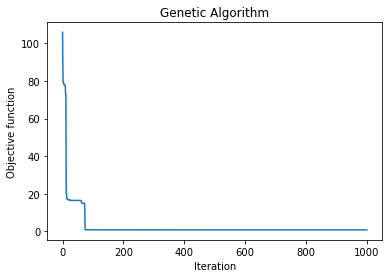

In [23]:
def f(X):
    A, k1, k2, theta1, theta2 = X
    t = np.linspace(0, 5E4, 100) 
    y0 = np.array([2290., 0., 0., 0., 0., 0.])
    architecture = arch_converter(A)
    param_values = [[2., k1, theta1], [2., k2, theta2]]
    extra_options = {'old_api': False, 'user_data': [architecture, param_values], 'rtol':1E-3}
    ode_solver = ode('cvode', toy_model, **extra_options)
    solution = ode_solver.solve(t, y0)
    j1, j2 = solution.values.y[-1, -2:]
    j1, j2, loss = loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2)
    if (str(solution.flag) == 'StatusEnum.SUCCESS') and loss > 0.0: return loss
    else: return 1.E7
    
varbound=np.array([[1,4],[1E-7,1E-3],[1E-7,1E-3], [1E-3, 10], [1E-3, 10]])
vartype=np.array([['int'], ['real'],['real'],['real'],['real']])


algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=5,variable_type_mixed=vartype,variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

results = model.output_dict

In [24]:
print(results)
model.report

{'variable': array([1.00000000e+00, 6.27138040e-04, 3.44948254e-04, 6.41854842e-01,
       1.52325767e-03]), 'function': 0.7968009570957402}


[105.98422149998792,
 87.46851623470347,
 79.07870416295238,
 79.07870416295238,
 79.07870416295238,
 77.84823380628899,
 77.84823380628899,
 77.84823380628899,
 77.84823380628899,
 77.84823380628899,
 72.82066446718595,
 72.82066446718595,
 20.40273566788463,
 20.40273566788463,
 17.41890749815472,
 17.41890749815472,
 17.41890749815472,
 16.82812839217974,
 16.82812839217974,
 16.82812839217974,
 16.82812839217974,
 16.82812839217974,
 16.82812839217974,
 16.82812839217974,
 16.82812839217974,
 16.493622398025558,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938,
 16.48685721998938


[CVODE ERROR]  CVode
  At t = 1683.87 and h = 0.000258091, the error test failed repeatedly or with |h| = hmin.



__________________________________________________ 0.3% GA is running...


[CVODE ERROR]  CVode
  At t = 410.58, mxstep steps taken before reaching tout.



__________________________________________________ 0.5% GA is running...


[CVODE ERROR]  CVode
  At t = 294.044, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 372.392 and h = 0.000180897, the error test failed repeatedly or with |h| = hmin.



__________________________________________________ 0.7% GA is running...


[CVODE ERROR]  CVode
  At t = 253.667, mxstep steps taken before reaching tout.



__________________________________________________ 0.8% GA is running...


[CVODE ERROR]  CVode
  At t = 250.543, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 354.451 and h = 0.000399457, the error test failed repeatedly or with |h| = hmin.



__________________________________________________ 0.9% GA is running...


[CVODE ERROR]  CVode
  At t = 390.102 and h = 0.000456828, the error test failed repeatedly or with |h| = hmin.



__________________________________________________ 1.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1306.8 and h = 0.000468262, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 477.328 and h = 0.000111398, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 390.102 and h = 0.000456828, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 390.102 and h = 0.000456828, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 399.613, mxstep steps taken before reaching tout.



|_________________________________________________ 1.1% GA is running...


[CVODE ERROR]  CVode
  At t = 333.435 and h = 0.000246451, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 395.618, mxstep steps taken before reaching tout.



|_________________________________________________ 1.3% GA is running...


[CVODE ERROR]  CVode
  At t = 99.8744, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 465.957, mxstep steps taken before reaching tout.



|_________________________________________________ 1.5% GA is running...


[CVODE ERROR]  CVode
  At t = 1468.37 and h = 0.000470118, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 465.957, mxstep steps taken before reaching tout.



|_________________________________________________ 1.8% GA is running...


[CVODE ERROR]  CVode
  At t = 464.135, mxstep steps taken before reaching tout.



|_________________________________________________ 1.9% GA is running...


[CVODE ERROR]  CVode
  At t = 848.053 and h = 0.00100812, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 99.8744, mxstep steps taken before reaching tout.



|_________________________________________________ 2.1% GA is running...


[CVODE ERROR]  CVode
  At t = 491.313, mxstep steps taken before reaching tout.



|_________________________________________________ 2.6% GA is running...


[CVODE ERROR]  CVode
  At t = 326.476, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 167.644, mxstep steps taken before reaching tout.



|_________________________________________________ 2.8% GA is running...


[CVODE ERROR]  CVode
  At t = 167.644, mxstep steps taken before reaching tout.



||________________________________________________ 3.0% GA is running...


[CVODE ERROR]  CVode
  At t = 167.644, mxstep steps taken before reaching tout.



||________________________________________________ 3.2% GA is running...


[CVODE ERROR]  CVode
  At t = 167.644, mxstep steps taken before reaching tout.



||________________________________________________ 3.3% GA is running...


[CVODE ERROR]  CVode
  At t = 709.268 and h = 0.000116708, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.5% GA is running...


[CVODE ERROR]  CVode
  At t = 563.556 and h = 3.40211e-05, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.6% GA is running...


[CVODE ERROR]  CVode
  At t = 406.31, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 496.693, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 563.556 and h = 3.40211e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 563.556 and h = 3.40211e-05, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.7% GA is running...


[CVODE ERROR]  CVode
  At t = 563.556 and h = 3.40211e-05, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 3.8% GA is running...


[CVODE ERROR]  CVode
  At t = 480.345, mxstep steps taken before reaching tout.



||________________________________________________ 4.3% GA is running...


[CVODE ERROR]  CVode
  At t = 769.276 and h = 0.000612277, the error test failed repeatedly or with |h| = hmin.



||________________________________________________ 4.4% GA is running...


[CVODE ERROR]  CVode
  At t = 392.397, mxstep steps taken before reaching tout.



||________________________________________________ 4.9% GA is running...


[CVODE ERROR]  CVode
  At t = 343.337, mxstep steps taken before reaching tout.



|||_______________________________________________ 5.3% GA is running...


[CVODE ERROR]  CVode
  At t = 523.6 and h = 0.00025763, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 523.6 and h = 0.00025763, the error test failed repeatedly or with |h| = hmin.



|||_______________________________________________ 5.4% GA is running...


[CVODE ERROR]  CVode
  At t = 280.91, mxstep steps taken before reaching tout.



|||_______________________________________________ 5.5% GA is running...


[CVODE ERROR]  CVode
  At t = 421.177, mxstep steps taken before reaching tout.



|||_______________________________________________ 6.1% GA is running...


[CVODE ERROR]  CVode
  At t = 368.772, mxstep steps taken before reaching tout.



||||______________________________________________ 7.9% GA is running...


[CVODE ERROR]  CVode
  At t = 488.713, mxstep steps taken before reaching tout.



||||______________________________________________ 8.5% GA is running...


[CVODE ERROR]  CVode
  At t = 454.081, mxstep steps taken before reaching tout.



||||______________________________________________ 8.9% GA is running...


[CVODE ERROR]  CVode
  At t = 1119.53 and h = 0.000944251, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 1119.53 and h = 0.000944251, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 1119.53 and h = 0.000944251, the error test failed repeatedly or with |h| = hmin.



||||______________________________________________ 9.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1119.53 and h = 0.000944251, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 2358.45 and h = 0.000310209, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 2358.45 and h = 0.000310209, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 9.2% GA is running...


[CVODE ERROR]  CVode
  At t = 2358.45 and h = 0.000310209, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 9.3% GA is running...


[CVODE ERROR]  CVode
  At t = 466.486, mxstep steps taken before reaching tout.



|||||_____________________________________________ 9.5% GA is running...


[CVODE ERROR]  CVode
  At t = 420.431, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 420.431, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 20032.9 and h = 0.0113078, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 420.431, mxstep steps taken before reaching tout.



|||||_____________________________________________ 9.8% GA is running...


[CVODE ERROR]  CVode
  At t = 8236.37 and h = 0.00269266, the error test failed repeatedly or with |h| = hmin.



|||||_____________________________________________ 10.2% GA is running...


[CVODE ERROR]  CVode
  At t = 231.064, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 436.339, mxstep steps taken before reaching tout.



|||||_____________________________________________ 10.8% GA is running...


[CVODE ERROR]  CVode
  At t = 1605.77 and h = 0.000861135, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 11.4% GA is running...


[CVODE ERROR]  CVode
  At t = 226.384, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 316.73, mxstep steps taken before reaching tout.



||||||____________________________________________ 11.5% GA is running...


[CVODE ERROR]  CVode
  At t = 1605.13 and h = 0.0001881, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 12.4% GA is running...


[CVODE ERROR]  CVode
  At t = 33999.2 and h = 0.0023184, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 12.5% GA is running...


[CVODE ERROR]  CVode
  At t = 33999.2 and h = 0.0023184, the error test failed repeatedly or with |h| = hmin.



||||||____________________________________________ 12.7% GA is running...


[CVODE ERROR]  CVode
  At t = 883.863 and h = 0.000388576, the error test failed repeatedly or with |h| = hmin.



|||||||___________________________________________ 13.1% GA is running...


[CVODE ERROR]  CVode
  At t = 819.655 and h = 0.00106437, the error test failed repeatedly or with |h| = hmin.



|||||||___________________________________________ 14.0% GA is running...


[CVODE ERROR]  CVode
  At t = 5113.2 and h = 0.002323, the error test failed repeatedly or with |h| = hmin.



|||||||___________________________________________ 14.2% GA is running...


[CVODE ERROR]  CVode
  At t = 20595.5 and h = 0.00451749, the error test failed repeatedly or with |h| = hmin.



|||||||___________________________________________ 14.3% GA is running...


[CVODE ERROR]  CVode
  At t = 384.636, mxstep steps taken before reaching tout.



|||||||___________________________________________ 14.4% GA is running...


[CVODE ERROR]  CVode
  At t = 6986.28 and h = 0.00300138, the error test failed repeatedly or with |h| = hmin.



|||||||___________________________________________ 14.7% GA is running...


[CVODE ERROR]  CVode
  At t = 428.131, mxstep steps taken before reaching tout.



|||||||___________________________________________ 14.9% GA is running...


[CVODE ERROR]  CVode
  At t = 384.274 and h = 0.000764902, the error test failed repeatedly or with |h| = hmin.



||||||||__________________________________________ 15.1% GA is running...


[CVODE ERROR]  CVode
  At t = 435.69, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 365.826 and h = 1.70335e-05, the error test failed repeatedly or with |h| = hmin.



||||||||__________________________________________ 15.3% GA is running...


[CVODE ERROR]  CVode
  At t = 459.634, mxstep steps taken before reaching tout.



||||||||__________________________________________ 15.7% GA is running...


[CVODE ERROR]  CVode
  At t = 427.33, mxstep steps taken before reaching tout.



||||||||__________________________________________ 16.3% GA is running...


[CVODE ERROR]  CVode
  At t = 459.732, mxstep steps taken before reaching tout.



||||||||__________________________________________ 16.7% GA is running...


[CVODE ERROR]  CVode
  At t = 360.837, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 297.008, mxstep steps taken before reaching tout.



||||||||__________________________________________ 16.8% GA is running...


[CVODE ERROR]  CVode
  At t = 475.117, mxstep steps taken before reaching tout.



||||||||__________________________________________ 16.9% GA is running...


[CVODE ERROR]  CVode
  At t = 469.479 and h = 0.000403189, the error test failed repeatedly or with |h| = hmin.



||||||||__________________________________________ 17.0% GA is running...


[CVODE ERROR]  CVode
  At t = 483.457, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 814.2 and h = 8.86963e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 17.2% GA is running...


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 10.16 and h = 2.97124e-06, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 17.3% GA is running...


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 886.634 and h = 0.000860277, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 18.0% GA is running...


[CVODE ERROR]  CVode
  At t = 670.051 and h = 0.000558987, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 18.1% GA is running...


[CVODE ERROR]  CVode
  At t = 1124.86 and h = 0.000253191, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 18.2% GA is running...


[CVODE ERROR]  CVode
  At t = 326.645, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 18.5% GA is running...


[CVODE ERROR]  CVode
  At t = 390.486, mxstep steps taken before reaching tout.



|||||||||_________________________________________ 18.6% GA is running...


[CVODE ERROR]  CVode
  At t = 1376.27 and h = 0.000203584, the error test failed repeatedly or with |h| = hmin.



|||||||||_________________________________________ 18.8% GA is running...


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.



||||||||||________________________________________ 19.0% GA is running...


[CVODE ERROR]  CVode
  At t = 408.51, mxstep steps taken before reaching tout.



||||||||||________________________________________ 19.3% GA is running...


[CVODE ERROR]  CVode
  At t = 1025 and h = 0.000412786, the error test failed repeatedly or with |h| = hmin.



||||||||||________________________________________ 19.5% GA is running...


[CVODE ERROR]  CVode
  At t = 630.278 and h = 5.89409e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||________________________________________ 19.7% GA is running...


[CVODE ERROR]  CVode
  At t = 430.145, mxstep steps taken before reaching tout.



||||||||||________________________________________ 19.8% GA is running...


[CVODE ERROR]  CVode
  At t = 630.278 and h = 5.89409e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||________________________________________ 20.2% GA is running...


[CVODE ERROR]  CVode
  At t = 259.98, mxstep steps taken before reaching tout.



||||||||||________________________________________ 21.0% GA is running...


[CVODE ERROR]  CVode
  At t = 258.669, mxstep steps taken before reaching tout.



|||||||||||_______________________________________ 21.4% GA is running...


[CVODE ERROR]  CVode
  At t = 941.202 and h = 0.000449255, the error test failed repeatedly or with |h| = hmin.



|||||||||||_______________________________________ 21.5% GA is running...


[CVODE ERROR]  CVode
  At t = 483.501, mxstep steps taken before reaching tout.



|||||||||||_______________________________________ 22.2% GA is running...


[CVODE ERROR]  CVode
  At t = 850.169 and h = 0.000862818, the error test failed repeatedly or with |h| = hmin.



|||||||||||_______________________________________ 22.6% GA is running...


[CVODE ERROR]  CVode
  At t = 303.703, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.2% GA is running...


[CVODE ERROR]  CVode
  At t = 478.763, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 23.4% GA is running...


[CVODE ERROR]  CVode
  At t = 1449.73 and h = 0.000161168, the error test failed repeatedly or with |h| = hmin.



||||||||||||______________________________________ 23.6% GA is running...


[CVODE ERROR]  CVode
  At t = 675.796 and h = 0.000302255, the error test failed repeatedly or with |h| = hmin.



||||||||||||______________________________________ 24.0% GA is running...


[CVODE ERROR]  CVode
  At t = 419.748, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 458.458, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 24.1% GA is running...


[CVODE ERROR]  CVode
  At t = 383.579, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 222.015, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 24.4% GA is running...


[CVODE ERROR]  CVode
  At t = 6326.43 and h = 0.00118088, the error test failed repeatedly or with |h| = hmin.



||||||||||||______________________________________ 24.5% GA is running...


[CVODE ERROR]  CVode
  At t = 259.802, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 459.202, mxstep steps taken before reaching tout.



||||||||||||______________________________________ 24.9% GA is running...


[CVODE ERROR]  CVode
  At t = 348.133, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 17.298 and h = 4.6644e-06, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 25.1% GA is running...


[CVODE ERROR]  CVode
  At t = 291.925, mxstep steps taken before reaching tout.



|||||||||||||_____________________________________ 25.7% GA is running...


[CVODE ERROR]  CVode
  At t = 458.072 and h = 1.81354e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 25.8% GA is running...


[CVODE ERROR]  CVode
  At t = 458.072 and h = 1.81354e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 458.072 and h = 1.81354e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||_____________________________________ 26.9% GA is running...


[CVODE ERROR]  CVode
  At t = 20108.6 and h = 0.0181346, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 27.1% GA is running...


[CVODE ERROR]  CVode
  At t = 1024.84 and h = 9.79836e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 27.2% GA is running...


[CVODE ERROR]  CVode
  At t = 996.837 and h = 0.000114238, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 996.837 and h = 0.000114238, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 27.4% GA is running...


[CVODE ERROR]  CVode
  At t = 996.837 and h = 0.000114238, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 473.305, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.5% GA is running...


[CVODE ERROR]  CVode
  At t = 501.825, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 27.9% GA is running...


[CVODE ERROR]  CVode
  At t = 1634.17 and h = 0.000364342, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 198.919, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 28.3% GA is running...


[CVODE ERROR]  CVode
  At t = 279.637 and h = 3.50044e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||____________________________________ 28.6% GA is running...


[CVODE ERROR]  CVode
  At t = 463.14, mxstep steps taken before reaching tout.



||||||||||||||____________________________________ 29.0% GA is running...


[CVODE ERROR]  CVode
  At t = 461.876, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.1% GA is running...


[CVODE ERROR]  CVode
  At t = 401.201, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.8% GA is running...


[CVODE ERROR]  CVode
  At t = 227.452, mxstep steps taken before reaching tout.



|||||||||||||||___________________________________ 29.9% GA is running...


[CVODE ERROR]  CVode
  At t = 423.282, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 31.2% GA is running...


[CVODE ERROR]  CVode
  At t = 396.503, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 31.8% GA is running...


[CVODE ERROR]  CVode
  At t = 323.358, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 31.9% GA is running...


[CVODE ERROR]  CVode
  At t = 147.44, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 32.0% GA is running...


[CVODE ERROR]  CVode
  At t = 376.516, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 376.516, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 32.4% GA is running...


[CVODE ERROR]  CVode
  At t = 486.231, mxstep steps taken before reaching tout.



||||||||||||||||__________________________________ 32.6% GA is running...


[CVODE ERROR]  CVode
  At t = 451.67, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 33.4% GA is running...


[CVODE ERROR]  CVode
  At t = 420.401, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 33.5% GA is running...


[CVODE ERROR]  CVode
  At t = 420.401, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 33.6% GA is running...


[CVODE ERROR]  CVode
  At t = 263.417, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 420.401, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 420.401, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 34.4% GA is running...


[CVODE ERROR]  CVode
  At t = 493.736, mxstep steps taken before reaching tout.



|||||||||||||||||_________________________________ 34.7% GA is running...


[CVODE ERROR]  CVode
  At t = 449.144 and h = 0.000440526, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 35.1% GA is running...


[CVODE ERROR]  CVode
  At t = 845.851 and h = 0.00105045, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 35.7% GA is running...


[CVODE ERROR]  CVode
  At t = 396.753, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 279.337, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 35.9% GA is running...


[CVODE ERROR]  CVode
  At t = 425.077, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 676.302 and h = 6.26234e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 36.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1087.68 and h = 2.07402e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 364.105 and h = 0.000382408, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 402.814 and h = 0.000338691, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||________________________________ 36.2% GA is running...


[CVODE ERROR]  CVode
  At t = 496.25, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.3% GA is running...


[CVODE ERROR]  CVode
  At t = 373.793, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 373.793, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.4% GA is running...


[CVODE ERROR]  CVode
  At t = 355.051, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 36.5% GA is running...


[CVODE ERROR]  CVode
  At t = 394.579, mxstep steps taken before reaching tout.



||||||||||||||||||________________________________ 37.0% GA is running...


[CVODE ERROR]  CVode
  At t = 252.675, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 1125.62 and h = 0.000326483, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 384.043, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.2% GA is running...


[CVODE ERROR]  CVode
  At t = 478.597, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 478.597, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.5% GA is running...


[CVODE ERROR]  CVode
  At t = 593.639 and h = 0.000381995, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 37.7% GA is running...


[CVODE ERROR]  CVode
  At t = 355.92, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 37.9% GA is running...


[CVODE ERROR]  CVode
  At t = 251.258, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 38.0% GA is running...


[CVODE ERROR]  CVode
  At t = 425.101, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 38.1% GA is running...


[CVODE ERROR]  CVode
  At t = 237.424, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 38.2% GA is running...


[CVODE ERROR]  CVode
  At t = 297.659, mxstep steps taken before reaching tout.



|||||||||||||||||||_______________________________ 38.6% GA is running...


[CVODE ERROR]  CVode
  At t = 702.892 and h = 1.3596e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||_______________________________ 38.9% GA is running...


[CVODE ERROR]  CVode
  At t = 428.5, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 428.5, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 39.0% GA is running...


[CVODE ERROR]  CVode
  At t = 486.097, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 368.82, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 39.1% GA is running...


[CVODE ERROR]  CVode
  At t = 428.5, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 428.5, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 39.2% GA is running...


[CVODE ERROR]  CVode
  At t = 411.671 and h = 0.000498444, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||______________________________ 40.1% GA is running...


[CVODE ERROR]  CVode
  At t = 281.985, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 40.2% GA is running...


[CVODE ERROR]  CVode
  At t = 281.985, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 361.09, mxstep steps taken before reaching tout.



||||||||||||||||||||______________________________ 40.7% GA is running...


[CVODE ERROR]  CVode
  At t = 382.565, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 41.4% GA is running...


[CVODE ERROR]  CVode
  At t = 988.286 and h = 3.95516e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 42.5% GA is running...


[CVODE ERROR]  CVode
  At t = 433.281, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 697.348 and h = 6.65514e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||_____________________________ 42.6% GA is running...


[CVODE ERROR]  CVode
  At t = 182.054, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 42.7% GA is running...


[CVODE ERROR]  CVode
  At t = 283.271, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 42.8% GA is running...


[CVODE ERROR]  CVode
  At t = 231.424, mxstep steps taken before reaching tout.



|||||||||||||||||||||_____________________________ 42.9% GA is running...


[CVODE ERROR]  CVode
  At t = 324.341, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.2% GA is running...


[CVODE ERROR]  CVode
  At t = 393.734, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 335.951, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 43.3% GA is running...


[CVODE ERROR]  CVode
  At t = 1081.8 and h = 0.000105726, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||____________________________ 44.2% GA is running...


[CVODE ERROR]  CVode
  At t = 344.585, mxstep steps taken before reaching tout.



||||||||||||||||||||||____________________________ 44.9% GA is running...


[CVODE ERROR]  CVode
  At t = 239.08, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.3% GA is running...


[CVODE ERROR]  CVode
  At t = 503.007, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.4% GA is running...


[CVODE ERROR]  CVode
  At t = 411.489, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 411.489, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.7% GA is running...


[CVODE ERROR]  CVode
  At t = 411.489, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 45.9% GA is running...


[CVODE ERROR]  CVode
  At t = 324.724 and h = 0.000181857, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||___________________________ 46.0% GA is running...


[CVODE ERROR]  CVode
  At t = 411.489, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.1% GA is running...


[CVODE ERROR]  CVode
  At t = 1011.76 and h = 2.16979e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||___________________________ 46.2% GA is running...


[CVODE ERROR]  CVode
  At t = 416.717, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 416.717, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.3% GA is running...


[CVODE ERROR]  CVode
  At t = 257.315, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.5% GA is running...


[CVODE ERROR]  CVode
  At t = 415.634, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 397.697, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 411.489, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.8% GA is running...


[CVODE ERROR]  CVode
  At t = 394.522, mxstep steps taken before reaching tout.



|||||||||||||||||||||||___________________________ 46.9% GA is running...


[CVODE ERROR]  CVode
  At t = 447.217, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 429.024, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 47.4% GA is running...


[CVODE ERROR]  CVode
  At t = 434.086, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 47.7% GA is running...


[CVODE ERROR]  CVode
  At t = 259.89, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.0% GA is running...


[CVODE ERROR]  CVode
  At t = 370.574, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.1% GA is running...


[CVODE ERROR]  CVode
  At t = 576.988 and h = 0.000546247, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||__________________________ 48.3% GA is running...


[CVODE ERROR]  CVode
  At t = 243.389, mxstep steps taken before reaching tout.



||||||||||||||||||||||||__________________________ 48.9% GA is running...


[CVODE ERROR]  CVode
  At t = 379.254, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 2474.29 and h = 0.000748655, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.1% GA is running...


[CVODE ERROR]  CVode
  At t = 2694.82 and h = 0.000116631, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.3% GA is running...


[CVODE ERROR]  CVode
  At t = 477.63, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 49.4% GA is running...


[CVODE ERROR]  CVode
  At t = 493.558, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 410.287, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 49.6% GA is running...


[CVODE ERROR]  CVode
  At t = 406.218, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 468.186 and h = 0.000504855, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 49.7% GA is running...


[CVODE ERROR]  CVode
  At t = 333.576, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 49.8% GA is running...


[CVODE ERROR]  CVode
  At t = 442.815, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 87.9179, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 50.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1956.47 and h = 0.00107707, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 50.1% GA is running...


[CVODE ERROR]  CVode
  At t = 108.002, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 341.117, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 50.2% GA is running...


[CVODE ERROR]  CVode
  At t = 341.117, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 371.775, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 50.3% GA is running...


[CVODE ERROR]  CVode
  At t = 719.016 and h = 0.000252153, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||_________________________ 50.5% GA is running...


[CVODE ERROR]  CVode
  At t = 493.37, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 111.237, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 50.6% GA is running...


[CVODE ERROR]  CVode
  At t = 234.594, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||_________________________ 50.8% GA is running...


[CVODE ERROR]  CVode
  At t = 283.665, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 51.1% GA is running...


[CVODE ERROR]  CVode
  At t = 394.894, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 51.2% GA is running...


[CVODE ERROR]  CVode
  At t = 392.043, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 51.6% GA is running...


[CVODE ERROR]  CVode
  At t = 383.398, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 51.7% GA is running...


[CVODE ERROR]  CVode
  At t = 358.414, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 383.398, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 51.9% GA is running...


[CVODE ERROR]  CVode
  At t = 467.851, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 52.4% GA is running...


[CVODE ERROR]  CVode
  At t = 349.631, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||________________________ 52.7% GA is running...


[CVODE ERROR]  CVode
  At t = 869.535 and h = 0.000661834, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||_______________________ 53.1% GA is running...


[CVODE ERROR]  CVode
  At t = 276.937, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 393.879, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 417.554, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 330.872, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 53.5% GA is running...


[CVODE ERROR]  CVode
  At t = 432.78, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 475.808, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 53.7% GA is running...


[CVODE ERROR]  CVode
  At t = 339.517, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||_______________________ 54.9% GA is running...


[CVODE ERROR]  CVode
  At t = 324.406, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 55.3% GA is running...


[CVODE ERROR]  CVode
  At t = 242.123, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 56.0% GA is running...


[CVODE ERROR]  CVode
  At t = 223.326, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 56.2% GA is running...


[CVODE ERROR]  CVode
  At t = 61.4744, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 56.5% GA is running...


[CVODE ERROR]  CVode
  At t = 293.051, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||______________________ 57.0% GA is running...


[CVODE ERROR]  CVode
  At t = 428.471, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 57.5% GA is running...


[CVODE ERROR]  CVode
  At t = 7.81954 and h = 2.57112e-07, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 331.875, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 57.6% GA is running...


[CVODE ERROR]  CVode
  At t = 481.297, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 266.153, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 57.7% GA is running...


[CVODE ERROR]  CVode
  At t = 476.93, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 257.297, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 57.8% GA is running...


[CVODE ERROR]  CVode
  At t = 234.032, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||_____________________ 58.5% GA is running...


[CVODE ERROR]  CVode
  At t = 479.964, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 59.5% GA is running...


[CVODE ERROR]  CVode
  At t = 235.78 and h = 0.00027933, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||____________________ 60.0% GA is running...


[CVODE ERROR]  CVode
  At t = 502.593, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 60.1% GA is running...


[CVODE ERROR]  CVode
  At t = 485.357, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||____________________ 60.9% GA is running...


[CVODE ERROR]  CVode
  At t = 353.194, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 61.3% GA is running...


[CVODE ERROR]  CVode
  At t = 237.262, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||___________________ 62.1% GA is running...


[CVODE ERROR]  CVode
  At t = 761.714 and h = 8.58203e-05, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 415.739 and h = 0.000150085, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||___________________ 62.5% GA is running...


[CVODE ERROR]  CVode
  At t = 385.577, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 63.0% GA is running...


[CVODE ERROR]  CVode
  At t = 252.014, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 63.1% GA is running...


[CVODE ERROR]  CVode
  At t = 252.014, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 252.014, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 252.014, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 455.934, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 63.4% GA is running...


[CVODE ERROR]  CVode
  At t = 272.955, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||__________________ 64.4% GA is running...


[CVODE ERROR]  CVode
  At t = 0.568614 and h = 2.80143e-07, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||_________________ 65.2% GA is running...


[CVODE ERROR]  CVode
  At t = 357.51 and h = 3.23415e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||_________________ 65.8% GA is running...


[CVODE ERROR]  CVode
  At t = 488.519, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||_________________ 65.9% GA is running...


[CVODE ERROR]  CVode
  At t = 731.377 and h = 0.000495349, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||_________________ 66.5% GA is running...


[CVODE ERROR]  CVode
  At t = 997.347 and h = 6.54209e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||________________ 67.0% GA is running...


[CVODE ERROR]  CVode
  At t = 387.183, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||________________ 67.2% GA is running...


[CVODE ERROR]  CVode
  At t = 42.8461, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||________________ 68.0% GA is running...


[CVODE ERROR]  CVode
  At t = 263.371, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||________________ 68.4% GA is running...


[CVODE ERROR]  CVode
  At t = 392.928, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 419.173, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||_______________ 69.8% GA is running...


[CVODE ERROR]  CVode
  At t = 402.976, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||_______________ 70.7% GA is running...


[CVODE ERROR]  CVode
  At t = 359.496, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||______________ 72.1% GA is running...


[CVODE ERROR]  CVode
  At t = 476.044, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||_____________ 74.8% GA is running...


[CVODE ERROR]  CVode
  At t = 231.377 and h = 5.38902e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||____________ 75.3% GA is running...


[CVODE ERROR]  CVode
  At t = 467.26, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 77.1% GA is running...


[CVODE ERROR]  CVode
  At t = 268.455, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 77.3% GA is running...


[CVODE ERROR]  CVode
  At t = 234.412, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 485.698, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 77.4% GA is running...


[CVODE ERROR]  CVode
  At t = 322.833, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 77.5% GA is running...


[CVODE ERROR]  CVode
  At t = 906.667 and h = 0.000227463, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||___________ 77.8% GA is running...


[CVODE ERROR]  CVode
  At t = 429.833, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 299.586, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 78.5% GA is running...


[CVODE ERROR]  CVode
  At t = 390.289, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||___________ 78.6% GA is running...


[CVODE ERROR]  CVode
  At t = 364.477, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 79.5% GA is running...


[CVODE ERROR]  CVode
  At t = 455.355 and h = 6.43759e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||__________ 79.6% GA is running...


[CVODE ERROR]  CVode
  At t = 106.198, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 79.8% GA is running...


[CVODE ERROR]  CVode
  At t = 430.741, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 79.9% GA is running...


[CVODE ERROR]  CVode
  At t = 368.749, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 450.616, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 80.1% GA is running...


[CVODE ERROR]  CVode
  At t = 326.414, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 486.493, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 80.3% GA is running...


[CVODE ERROR]  CVode
  At t = 450.616, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 80.4% GA is running...


[CVODE ERROR]  CVode
  At t = 431.914, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 80.7% GA is running...


[CVODE ERROR]  CVode
  At t = 345.981, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 80.8% GA is running...


[CVODE ERROR]  CVode
  At t = 282.959, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 80.9% GA is running...


[CVODE ERROR]  CVode
  At t = 450.616, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||__________ 81.0% GA is running...


[CVODE ERROR]  CVode
  At t = 450.616, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.2% GA is running...


[CVODE ERROR]  CVode
  At t = 450.616, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.4% GA is running...


[CVODE ERROR]  CVode
  At t = 446.244, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.5% GA is running...


[CVODE ERROR]  CVode
  At t = 450.616, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 81.7% GA is running...


[CVODE ERROR]  CVode
  At t = 459.987, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.1% GA is running...


[CVODE ERROR]  CVode
  At t = 376.54, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.2% GA is running...


[CVODE ERROR]  CVode
  At t = 379.652, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 397.383, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||_________ 82.4% GA is running...


[CVODE ERROR]  CVode
  At t = 649.633 and h = 0.000204364, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||_________ 82.7% GA is running...


[CVODE ERROR]  CVode
  At t = 463.155, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||________ 83.8% GA is running...


[CVODE ERROR]  CVode
  At t = 466.333 and h = 0.000105956, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||________ 84.1% GA is running...


[CVODE ERROR]  CVode
  At t = 415.84, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 85.5% GA is running...


[CVODE ERROR]  CVode
  At t = 460.187, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 421.928, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 85.8% GA is running...


[CVODE ERROR]  CVode
  At t = 299.939, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 287.158, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 556.769 and h = 0.000282129, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||_______ 85.9% GA is running...


[CVODE ERROR]  CVode
  At t = 325.215, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.3% GA is running...


[CVODE ERROR]  CVode
  At t = 896.349 and h = 0.000449159, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 451.106, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.7% GA is running...


[CVODE ERROR]  CVode
  At t = 464.971, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||_______ 86.9% GA is running...


[CVODE ERROR]  CVode
  At t = 295.435 and h = 0.000137537, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 87.9% GA is running...


[CVODE ERROR]  CVode
  At t = 6554.85 and h = 0.00402045, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 88.0% GA is running...


[CVODE ERROR]  CVode
  At t = 1652.11 and h = 1.5444e-05, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 88.1% GA is running...


[CVODE ERROR]  CVode
  At t = 2.03712 and h = 1.40269e-06, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||______ 89.0% GA is running...


[CVODE ERROR]  CVode
  At t = 549.411 and h = 0.000302787, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 375.503, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 89.2% GA is running...


[CVODE ERROR]  CVode
  At t = 254.772, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 89.3% GA is running...


[CVODE ERROR]  CVode
  At t = 442.071, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 89.9% GA is running...


[CVODE ERROR]  CVode
  At t = 362.476, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 90.2% GA is running...


[CVODE ERROR]  CVode
  At t = 267.278, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 90.6% GA is running...


[CVODE ERROR]  CVode
  At t = 287.484, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||_____ 90.9% GA is running...


[CVODE ERROR]  CVode
  At t = 489.176, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||____ 91.3% GA is running...


[CVODE ERROR]  CVode
  At t = 183.458, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 13151.5 and h = 0.000201101, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 189.898, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||____ 91.4% GA is running...


[CVODE ERROR]  CVode
  At t = 263.551, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 93.3% GA is running...


[CVODE ERROR]  CVode
  At t = 287.266, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 93.5% GA is running...


[CVODE ERROR]  CVode
  At t = 464.675 and h = 9.03625e-05, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.0% GA is running...


[CVODE ERROR]  CVode
  At t = 278.769, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.2% GA is running...


[CVODE ERROR]  CVode
  At t = 278.769, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.8% GA is running...


[CVODE ERROR]  CVode
  At t = 241.58, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||___ 94.9% GA is running...


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 95.0% GA is running...


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 362.514, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 95.1% GA is running...


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 383.955 and h = 0.00121621, the error test failed repeatedly or with |h| = hmin.



||||||||||||||||||||||||||||||||||||||||||||||||__ 95.2% GA is running...


[CVODE ERROR]  CVode
  At t = 368.894, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 359.391, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.1% GA is running...


[CVODE ERROR]  CVode
  At t = 377.658, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.3% GA is running...


[CVODE ERROR]  CVode
  At t = 206.035, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 96.8% GA is running...


[CVODE ERROR]  CVode
  At t = 493.668, mxstep steps taken before reaching tout.



||||||||||||||||||||||||||||||||||||||||||||||||__ 97.0% GA is running...


[CVODE ERROR]  CVode
  At t = 966.177 and h = 0.000778861, the error test failed repeatedly or with |h| = hmin.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.0% GA is running...


[CVODE ERROR]  CVode
  At t = 361.042, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.1% GA is running...


[CVODE ERROR]  CVode
  At t = 339.71, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 301.635, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 301.635, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 339.71, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.2% GA is running...


[CVODE ERROR]  CVode
  At t = 227.789, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.8% GA is running...


[CVODE ERROR]  CVode
  At t = 454.407, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||| 99.1% GA is running...


[CVODE ERROR]  CVode
  At t = 364.391 and h = 0.000376081, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 232.81, mxstep steps taken before reaching tout.



|||||||||||||||||||||||||||||||||||||||||||||||||| 99.5% GA is running...


[CVODE ERROR]  CVode
  At t = 6.84721 and h = 1.66579e-06, the error test failed repeatedly or with |h| = hmin.


[CVODE ERROR]  CVode
  At t = 280.383, mxstep steps taken before reaching tout.



 The best solution found:                                                                           
 [1.00000000e+00 3.86107381e-04 5.30177764e-05 4.18538001e+00
 1.21745604e-03]

 Objective function:
 0.6500351076082641


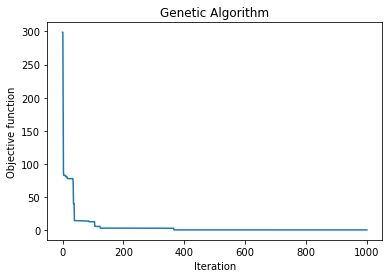

In [26]:
def f(X):
    A, k1, k2, theta1, theta2 = X
    t = np.linspace(0, 5E4, 100) 
    y0 = np.array([2290., 0., 0., 0., 0., 0.])
    architecture = arch_converter(A)
    param_values = [[2., k1, theta1], [2., k2, theta2]]
    extra_options = {'old_api': False, 'user_data': [architecture, param_values], 'rtol':1E-3}
    ode_solver = ode('cvode', toy_model, **extra_options)
    solution = ode_solver.solve(t, y0)
    j1, j2 = solution.values.y[-1, -2:]
    j1, j2, loss = loss_biological(j1, j2, alpha1=1E-5, alpha2=1E-2)
    if (str(solution.flag) == 'StatusEnum.SUCCESS') and loss > 0.0: return loss
    else: return 1.E7
    
varbound=np.array([[1,4],[1E-7,1E-3],[1E-7,1E-3], [1E-3, 10], [1E-3, 10]])
vartype=np.array([['int'], ['real'],['real'],['real'],['real']])


algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=5,variable_type_mixed=vartype,variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

results = model.output_dict

In [27]:
print(results)
model.report

{'variable': array([1.00000000e+00, 3.86107381e-04, 5.30177764e-05, 4.18538001e+00,
       1.21745604e-03]), 'function': 0.6500351076082641}


[298.7446740057969,
 298.7446740057969,
 173.64098706149932,
 87.33837285604002,
 82.86404076652282,
 82.86404076652282,
 82.86404076652282,
 82.63212447385062,
 82.63212447385062,
 82.63212447385062,
 82.63212447385062,
 80.5825676196329,
 80.5825676196329,
 80.5825676196329,
 80.5825676196329,
 80.5825676196329,
 78.02971030207618,
 78.02971030207618,
 78.02971030207618,
 78.02971030207618,
 78.02971030207618,
 78.02971030207618,
 78.02971030207618,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 77.98205109318283,
 70.89348174894228,
 40.24483820970584,
 40.24483820970584,
 40.24483820970584,
 14.644244247284115,
 14.644244247284115,
 14.607584890503817,
 14.607584890503817,
 14.607584890503817,
 14.607584890503817,
 14.607584890503817,
 14.607584890503817,
 14.607584890503817,
 14.607584890503817,
 14.6075848905